In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.datasets import make_classification, make_blobs

from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
# Load the cancer data
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)
clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.92
Accuracy of Linear SVC classifier on test set: 0.92


In [27]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)


clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


Breast cancer dataset (normalized with MinMax scaling)


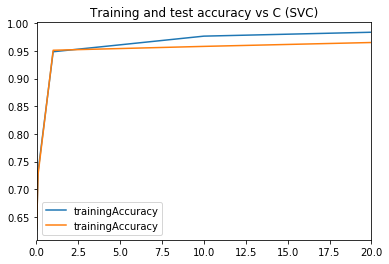

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
   
print('Breast cancer dataset (normalized with MinMax scaling)')
trainingAccuracy=[]
testAccuracy=[]
for C1 in [.01,.1, 1, 10, 20]:
    clf = SVC(C=C1).fit(X_train_scaled, y_train)
    acctrain=clf.score(X_train_scaled, y_train)
    accTest=clf.score(X_test_scaled, y_test)
    trainingAccuracy.append(acctrain)
    testAccuracy.append(accTest)
    
# Create a dataframe
C1=[.01,.1, 1, 10, 20]   
trainingAccuracy=pd.DataFrame(trainingAccuracy,index=C1)
testAccuracy=pd.DataFrame(testAccuracy,index=C1)

# Plot training and test R squared as a function of alpha
df=pd.concat([trainingAccuracy,testAccuracy],axis=1)
df.columns=['trainingAccuracy','trainingAccuracy']

fig5=df.plot()
fig5=plt.title('Training and test accuracy vs C (SVC)')
plt.show()

In [26]:
?LinearSVC